In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, normalize, RobustScaler
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use("seaborn-v0_8-colorblind")
import os
os.getcwd()

'c:\\Users\\josh_\\Documents\\GitHub\\HenrysLaw\\Presentation\\Final'

In [2]:
master = pd.read_csv("../../Data/Combined/0.5.0-CleanedMaster.csv")
master.replace([np.inf, -np.inf], np.nan, inplace=True)
master.describe()

,nIsomers,Temperature,logS,HenryConstant
count,21291.000000,21291.000000,11703.000000,1.216700e+04
mean,1.125405,791.608431,-2.904624,3.053808e+35
std,0.668178,2171.774397,2.309160,3.209370e+37
min,1.000000,-6973.150000,-13.171985,8.000000e-14
25%,1.000000,25.000000,-4.280443,6.921429e-03
50%,1.000000,25.000000,-2.656642,9.943478e-01
75%,1.000000,25.000000,-1.303892,4.243345e+03
max,32.000000,28726.850000,4.594527,3.535500e+39


In [3]:
master["InChI"].value_counts().nlargest(5)

InChI
InChI=1S/C6H12O/c7-6-4-2-1-3-5-6/h6-7H,1-5H2    26
InChI=1S/C5H12O/c1-2-3-4-5-6/h6H,2-5H2,1H3      26
InChI=1S/C4H10O/c1-4(2)3-5/h4-5H,3H2,1-2H3      24
InChI=1S/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3        24
InChI=1S/C4H10O/c1-2-3-4-5/h5H,2-4H2,1H3        23
Name: count, dtype: int64

In [4]:
targets = ["logS", "HenryConstant"]
for targ in targets:
    df = master.copy()
    df.dropna(subset = targ, inplace=True)
    df.drop_duplicates(inplace=True)
    inchi = df["InChI"].values.tolist()
    print(len(np.unique(inchi)))

    print(targ, df.shape)
    mostAbundant = df["InChI"].value_counts().nlargest(5)
    print(mostAbundant, "\n\n")
    mostAbundant.to_csv(f"../Final/Top5InChI_{targ[0:4]}.csv")

11089
logS (11703, 9)
InChI
InChI=1S/C6H12O/c7-6-4-2-1-3-5-6/h6-7H,1-5H2       24
InChI=1S/C4H10O/c1-4(2)3-5/h4-5H,3H2,1-2H3         21
InChI=1S/C5H12O/c1-2-3-4-5-6/h6H,2-5H2,1H3         18
InChI=1S/C4H10/c1-3-4-2/h3-4H2,1-2H3               16
InChI=1S/C6H12O2/c1-5(2)4-8-6(3)7/h5H,4H2,1-3H3    13
Name: count, dtype: int64 


9532
HenryConstant (12167, 9)
InChI
InChI=1S/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3    24
InChI=1S/C6H6/c1-2-4-6-5-3-1/h1-6H          21
InChI=1S/C2HCl3/c3-1-2(4)5/h1H              20
InChI=1S/C2H3Cl3/c1-2(3,4)5/h1H3            20
InChI=1S/C3H6O/c1-3(2)4/h1-2H3              18
Name: count, dtype: int64 




## MSE Distribtution of logH validation set

In [6]:
df = pd.read_csv("../../Results/logHenry/Prediction/LGBM/0.2.2_MRobust-2024-08-19_17.24.15_ValidationMSE.csv")

In [7]:
mseH = df["MSE(Henry)"].values.astype(list)
mselogH = df["MSE(log)"].values.astype(list)

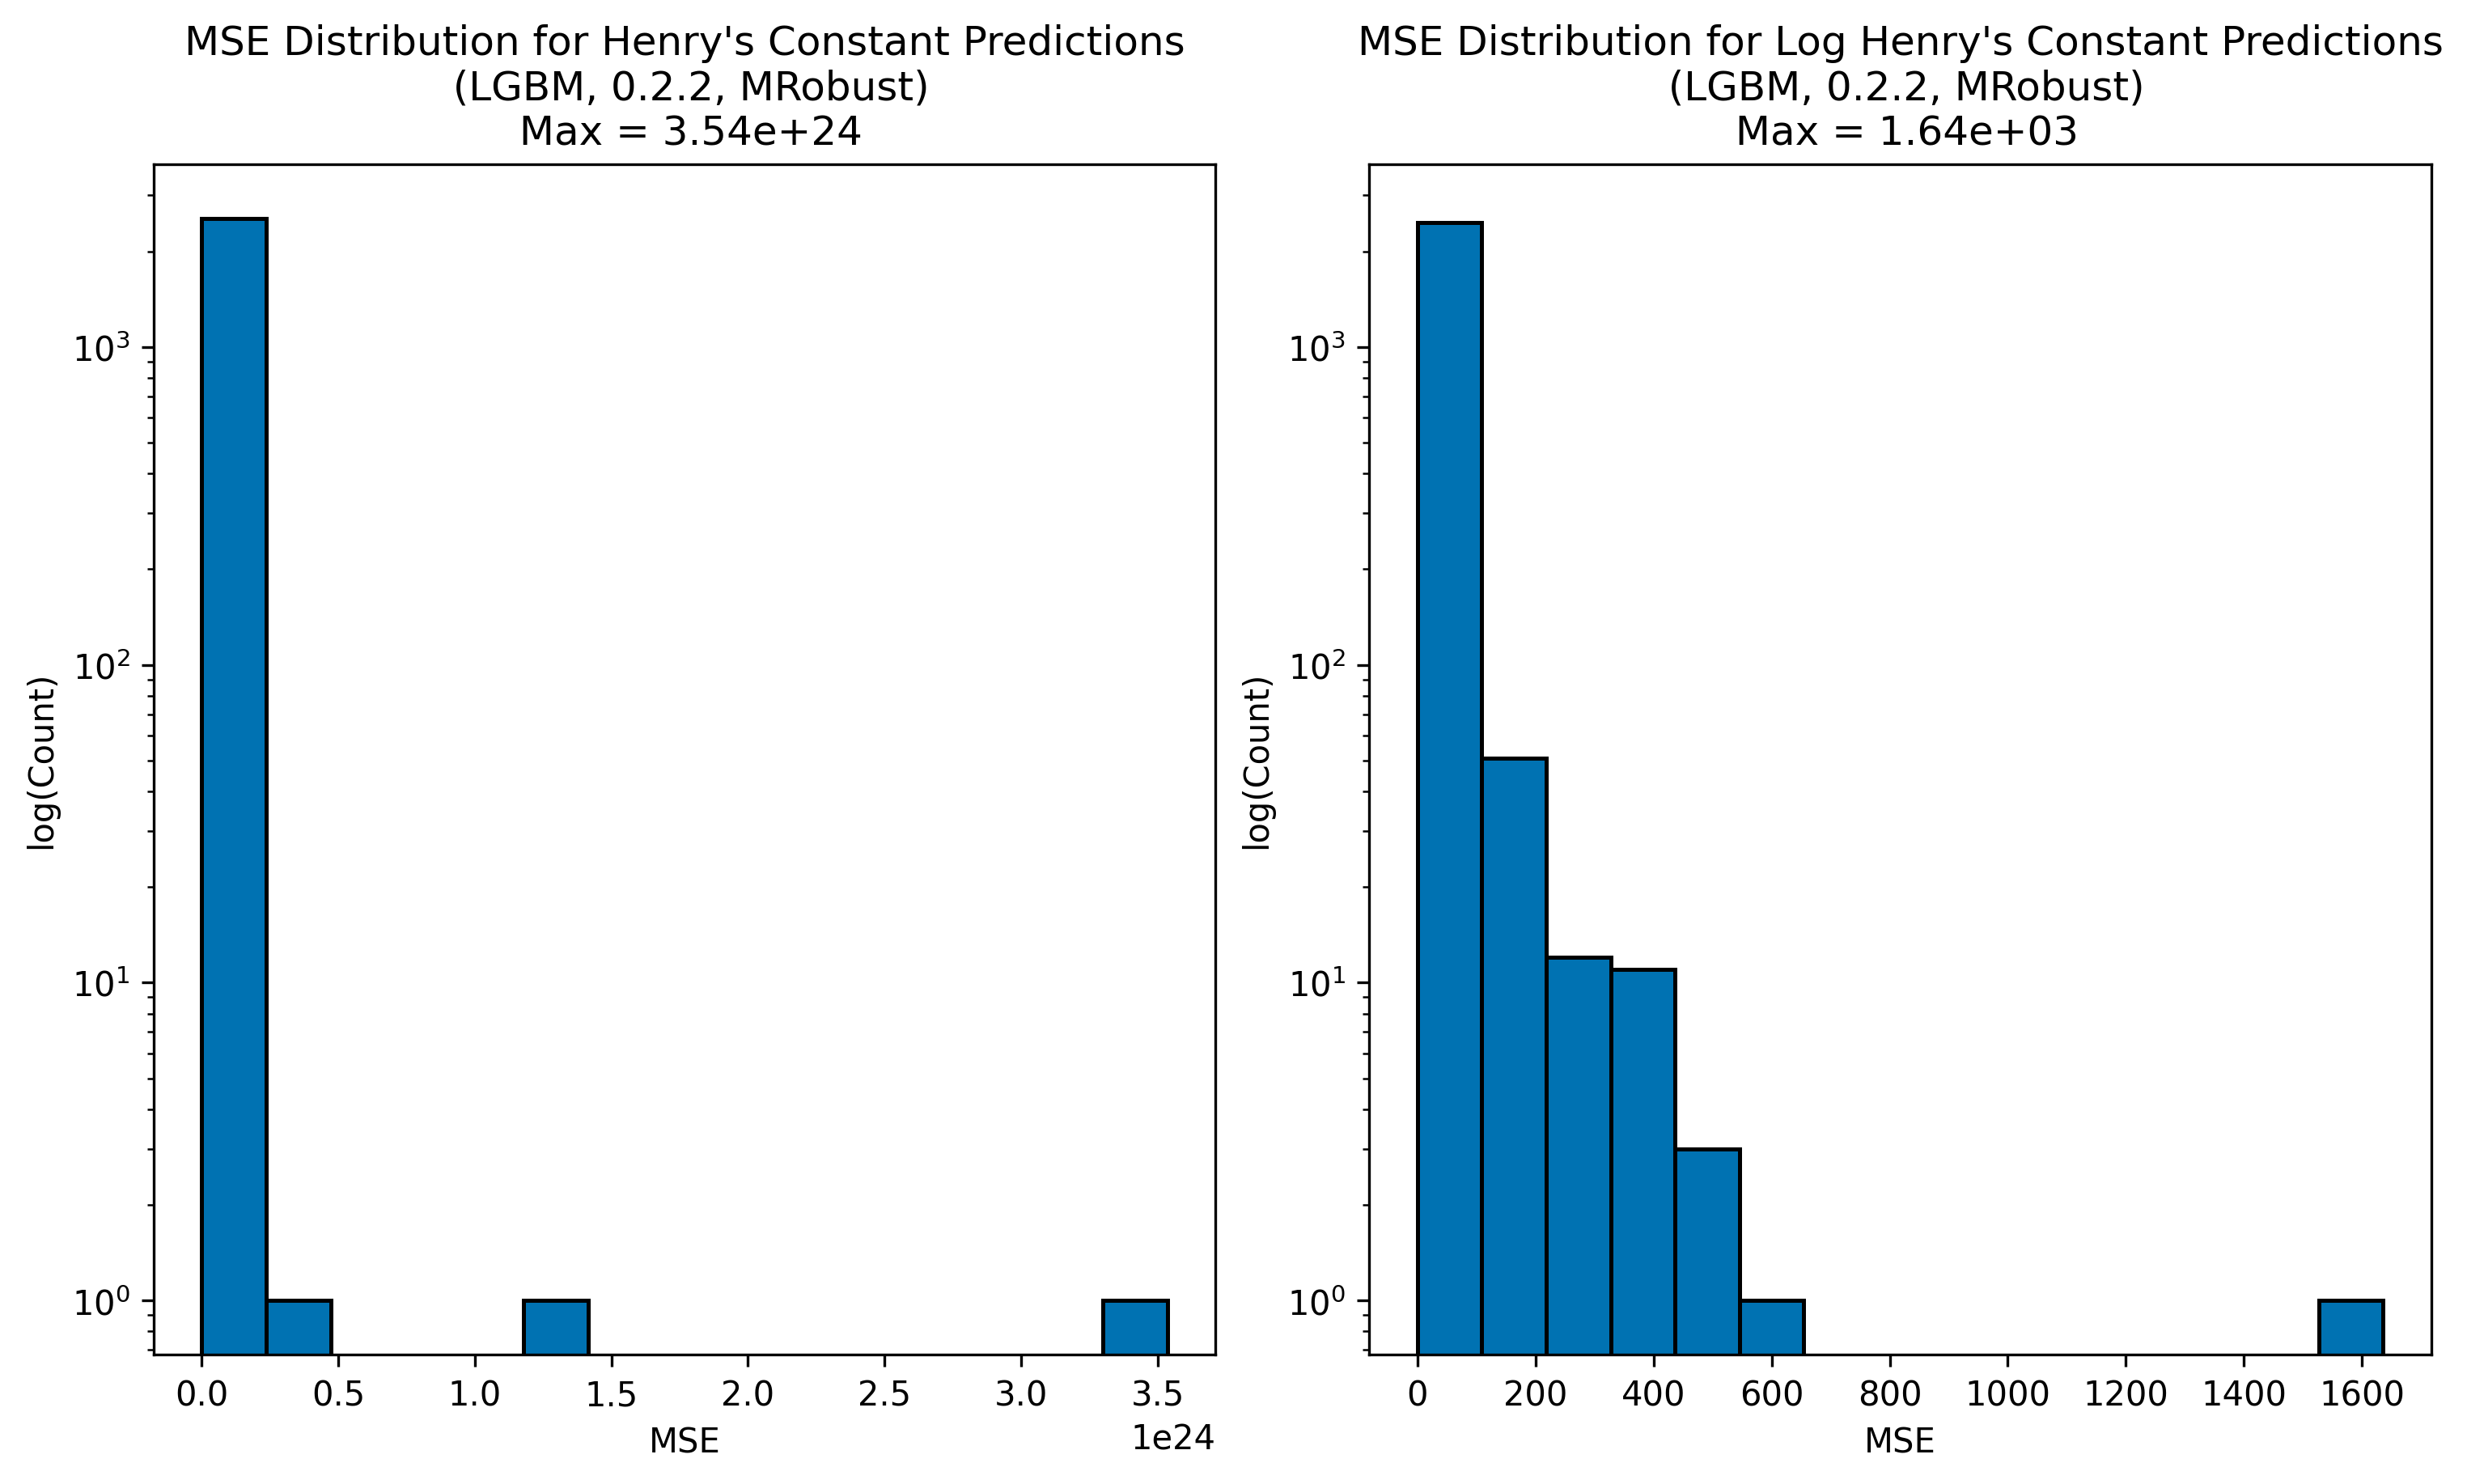

In [8]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10, 6), layout="constrained", dpi=300, sharey=True)
ax0.hist(mseH, bins=15, edgecolor="black", linewidth=1.2)
ax0.set_xlabel("MSE")
ax0.set_ylabel("log(Count)")
ax0.set_title(f"MSE Distribution for Henry's Constant Predictions\n (LGBM, 0.2.2, MRobust)\n Max = {np.max(mseH):.2e}")

ax1.hist(mselogH, bins=15, edgecolor="black", linewidth=1.2)
ax1.yaxis.set_tick_params(labelbottom=True)
ax1.set_yscale("log")
ax1.set_xlabel("MSE")
ax1.set_ylabel("log(Count)")
ax1.set_title(f"MSE Distribution for Log Henry's Constant Predictions\n (LGBM, 0.2.2, MRobust)\n Max = {np.max(mselogH):.2e}")

plt.show()

In [11]:
df = pd.read_csv("../../Results/logS/Prediction/LGBM/0.2.2_MRobust-2024-08-19_17.24.15_ValidationMSE.csv")
mse = df["MSE"].values.tolist()

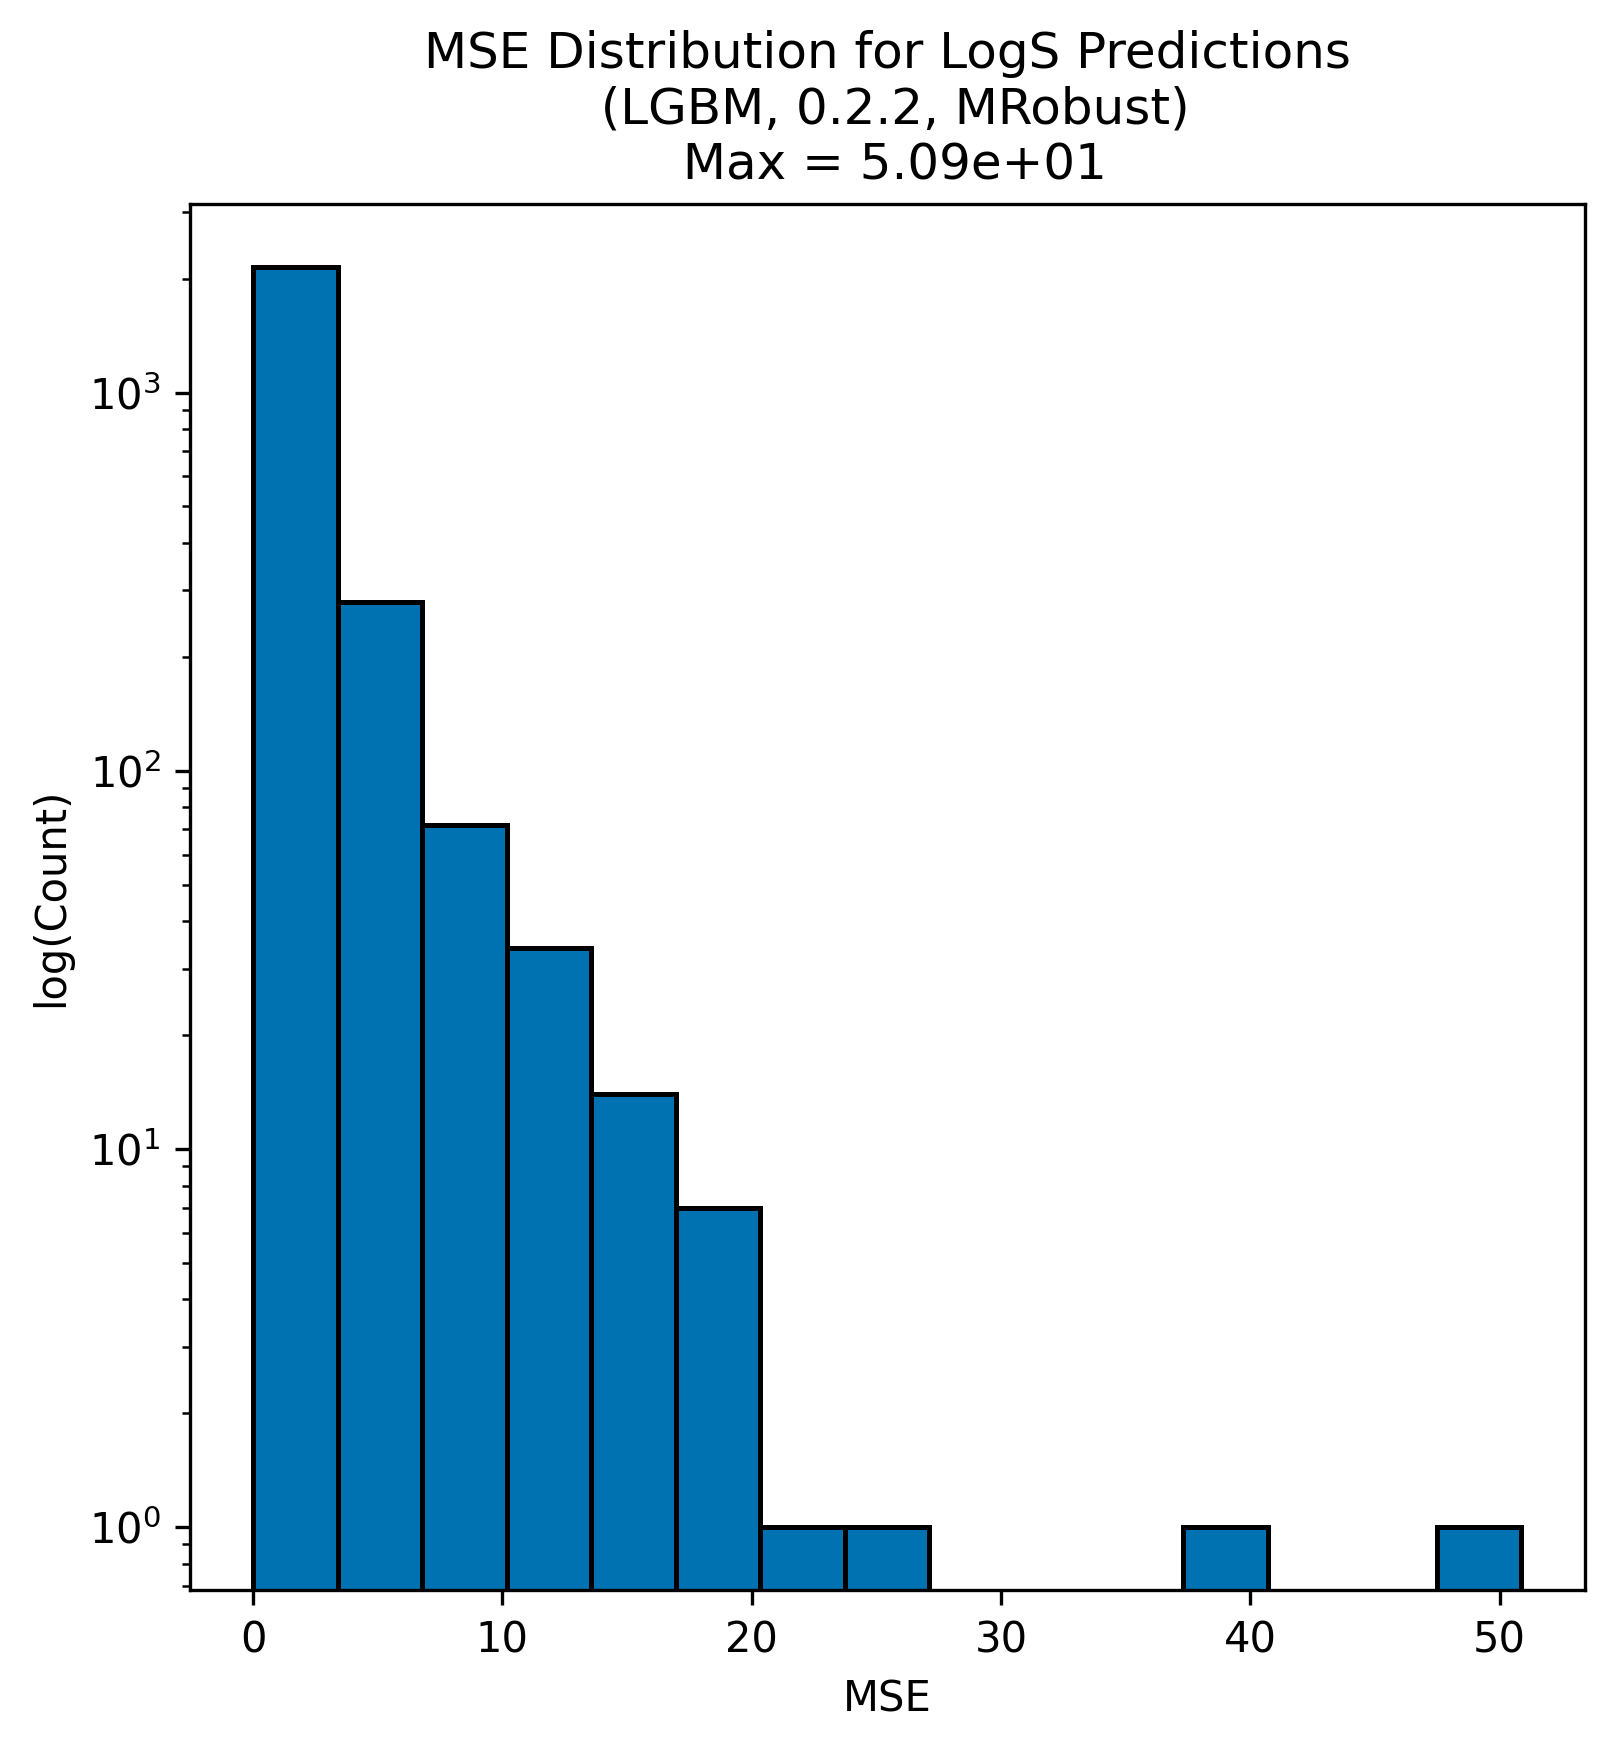

In [12]:
fig, ax = plt.subplots(figsize = (6, 6), dpi=300)
ax.hist(mse, bins=15, edgecolor="black", linewidth=1.2)
ax.set_xlabel("MSE")
ax.set_ylabel("log(Count)")
ax.set_yscale("log")
ax.set_title(f"MSE Distribution for LogS Predictions\n (LGBM, 0.2.2, MRobust)\n Max = {np.max(mse):.2e}")
plt.show()